**PRACTICA FINAL - Machine Learning: Modelos Supervisados:**

ALUMNOS:
*   Enrique González Rodríguez
*   Jose Luis González Rodríguez
*   Francisco Díaz Andreu








Importamos las librerias

In [ ]:
!pip3 uninstall umap
!pip3 install umap-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

from time import sleep
from random import shuffle

import numpy as np
from numpy import atleast_2d
import pandas as pd

import time
from sklearn.decomposition import PCA, SparsePCA
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from umap import UMAP

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from IPython import display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORTACIÓN DEL DATASET**

El dataset contiene información sobre accidentes de vehículos en Canada


In [ ]:
df = pd.read_csv("ncdb.csv")

In [ ]:
df.head(10)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2001,5,5,16,2,02,33,02,1,1,...,01,01,1986,02,M,15,13,1,UU,2
1,2008,10,3,13,2,02,21,02,1,1,...,02,05,2002,02,M,04,23,1,02,2
2,2009,8,7,09,2,02,36,02,1,1,...,2,01,2004,02,F,17,21,2,02,2
3,2003,4,5,18,2,2,UU,UU,U,U,...,2,01,1996,03,F,02,21,2,02,2
4,2014,9,1,07,2,03,21,01,1,1,...,2,01,2001,01,F,36,11,2,02,1
5,2014,12,1,07,2,01,04,01,2,5,...,1,06,1998,01,M,67,11,2,02,1
6,2013,12,2,14,2,02,35,UU,1,2,...,1,01,UUUU,01,F,25,11,2,02,1
7,1999,4,6,23,2,01,03,01,1,1,...,01,01,1990,01,M,20,11,2,01,1
8,2002,6,7,09,2,01,04,01,3,2,...,01,14,2000,01,F,57,11,2,NN,5
9,2013,12,4,10,2,02,21,02,1,1,...,1,01,2007,01,F,82,11,1,UU,1


Comprobamos los distintos tipos de variables que hay en el Dataset

In [ ]:
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

**PROCESAMIENTO INICIAL DE LOS DATOS**

Comprobamamos si tenemos valores missing

In [ ]:
df.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Podemos ver que no encontramos ningun valor missing dentro del dataset. Gracias al diccionario de datos podemos conocer que existen ciertos datos, como los que se reemplazan en el código de abajo, que son datos desconocidos por lo que procedemos a reemplazarlos por valores missing "NA", para poder tratarlos de una manera mas cómoda y sencilla

In [ ]:
df = df.replace("UU",np.nan)
df = df.replace("XX",np.nan)
df = df.replace("QQ",np.nan)
df = df.replace("X",np.nan)
df = df.replace("U",np.nan)
df = df.replace("Q",np.nan)
df = df.replace("N",np.nan)
df = df.replace("NN",np.nan)
df = df.replace("NNNN",np.nan)
df = df.replace("UUUU",np.nan)
df = df.replace("XXXX",np.nan)

In [ ]:
df.isnull().sum()

C_YEAR       0
C_MNTH       1
C_WDAY       3
C_HOUR     186
C_SEV        0
C_VEHS       1
C_CONF    1503
C_RCFG    2161
C_WTHR     341
C_RSUR     789
C_RALN    1533
C_TRAF     995
V_ID         1
V_TYPE     914
V_YEAR    1970
P_ID        31
P_SEX      858
P_AGE     1349
P_PSN      292
P_ISEV    1250
P_SAFE    4143
P_USER     568
dtype: int64

Calculamos las modas y medias de todas las columnas, para sustituir lo Na por los valores calculados

In [ ]:
df['C_RCFG'] = pd.to_numeric(df['C_RCFG'])
df['C_RCFG'].mode()
df['C_RCFG'] = df ['C_RCFG']. fillna(2)
df['C_TRAF'] = pd.to_numeric(df['C_TRAF'])
df['C_TRAF'].mode()
df['C_CONF'] = df ['C_CONF']. fillna(21)
df['C_SEV'] = pd.to_numeric(df['C_SEV'])
df['C_SEV'].mode()
df['C_SEV'] = df ['C_SEV']. fillna(2)
df['C_WTHR'] = pd.to_numeric(df['C_WTHR'])
df['C_WTHR'].mode()
df['C_WTHR'] = df ['C_WTHR']. fillna(1)
df['C_VEHS'] = pd.to_numeric(df['C_VEHS'])
df['C_VEHS'].mode()
df['C_VEHS'] = df ['C_VEHS']. fillna(2)
df['C_RSUR'] = pd.to_numeric(df['C_RSUR'])
df['C_RSUR'].mode()
df['C_RSUR'] = df ['C_RSUR']. fillna(1)
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'])
df['P_ISEV'].mode()
df['P_ISEV'] = df ['P_ISEV']. fillna(2)
df['P_USER'] = pd.to_numeric(df['P_USER'])
df['P_USER'].mode()
df['P_USER'] = df ['P_USER']. fillna(1)

In [ ]:
df['V_YEAR'] = pd.to_numeric(df['V_YEAR'])
df['V_YEAR'].mean()
df ['V_YEAR'] = df ['V_YEAR']. fillna(1999)
df['P_AGE'] = pd.to_numeric(df['P_AGE'])
df['P_AGE'].mean()
df ['P_AGE'] = df ['P_AGE']. fillna(37)

Eliminamos la columna C_RALN y P_SEX

In [ ]:
df = df.drop(['C_RALN'], axis=1)
df = df.drop(['P_SEX'], axis=1)

Reemplazamos en la columa P_SAFE los NAs por 0 ya que hay más de 4.000 registros missing

In [ ]:
df['P_SAFE'] = df['P_SAFE'].fillna(0)
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2001,5,5,16,2,2.0,33,2.0,1.0,1.0,18.0,01,01,1986.0,02,15.0,13,1.0,0,2.0
1,2008,10,3,13,2,2.0,21,2.0,1.0,1.0,18.0,02,05,2002.0,02,4.0,23,1.0,02,2.0
2,2009,8,7,09,2,2.0,36,2.0,1.0,1.0,18.0,2,01,2004.0,02,17.0,21,2.0,02,2.0
3,2003,4,5,18,2,2.0,21,2.0,1.0,1.0,NaN,2,01,1996.0,03,2.0,21,2.0,02,2.0
4,2014,9,1,07,2,3.0,21,1.0,1.0,1.0,1.0,2,01,2001.0,01,36.0,11,2.0,02,1.0


Eliminamos las filas con NA

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Unificamos los datos con diferentes etiquetas pero manteniendo el significado

In [ ]:
df= df.replace(["01"], ["1"])
df= df.replace(["02"], ["2"])
df= df.replace(["03"], ["3"])
df= df.replace(["04"], ["4"])
df= df.replace(["05"], ["5"])
df= df.replace(["06"], ["6"])
df= df.replace(["07"], ["7"])
df= df.replace(["08"], ["8"])
df= df.replace(["09"], ["9"])
df= df.replace(["00"], ["0"])

Transformamos a numéricas las variables

In [ ]:
df['C_MNTH'] = pd.to_numeric(df['C_MNTH'])
df['C_WDAY'] = pd.to_numeric(df['C_WDAY'])
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'])
df['V_ID'] = pd.to_numeric(df['V_ID'])
df['V_TYPE'] = pd.to_numeric(df['V_TYPE'])
df['P_ID'] = pd.to_numeric(df['P_ID'])
df['P_PSN'] = pd.to_numeric(df['P_PSN'])
df['P_PSN'] = pd.to_numeric(df['P_PSN'])
df['P_SAFE'] = pd.to_numeric(df['P_SAFE'])     

In [ ]:
df.shape

(17768, 20)

Tras el procesamiento inicial de los datos, observamos que nos quedamos con un dataset final compuesto por 17.768 filas y 20 columnas

In [ ]:
df.describe()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000
mean,2005.873818,6.690173,4.022569,13.695520,1.984298,2.101925,1.750338,1.600687,1.552679,10.741333,1.561684,2.230020,1998.485930,1.466738,36.447940,13.377533,1.579525,1.937022,1.438991
std,4.572383,3.405036,1.935964,5.164153,0.124325,1.546750,0.729632,1.119270,1.089218,8.088548,1.021809,3.598472,6.810547,1.195250,17.793747,8.593905,0.503918,1.960586,0.801511
min,1999.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1914.000000,1.000000,1.000000,11.000000,1.000000,0.000000,1.000000
25%,2002.000000,4.000000,2.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,22.000000,11.000000,1.000000,2.000000,1.000000
50%,2005.000000,7.000000,4.000000,14.000000,2.000000,2.000000,2.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1999.000000,1.000000,36.000000,11.000000,2.000000,2.000000,1.000000
75%,2010.000000,10.000000,6.000000,17.000000,2.000000,2.000000,2.000000,2.000000,2.000000,18.000000,2.000000,1.000000,2003.000000,2.000000,48.000000,13.000000,2.000000,2.000000,2.000000
max,2014.000000,12.000000,7.000000,23.000000,2.000000,77.000000,10.000000,7.000000,8.000000,18.000000,48.000000,23.000000,2015.000000,48.000000,99.000000,98.000000,3.000000,13.000000,5.000000


observamos como la columna C_SEV, que será la variable objetivo de nuestro modelo, tiene una media de 1.98 y una desviación típica muy baja de 0.12, Por otra lado, solamente se encuentra compuesta por dos valores diferentes, el 1 que es para los casos en el que existen al menos un fallecimiento en el accidente y el 2, que es para los casos en los que se produce lesiones no mortales en el accidente

In [ ]:
corr = df.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.000000,0.006928,-0.023732,0.007521,0.003049,0.013756,-0.023109,-0.009538,0.001572,-0.024103,0.014171,0.007231,0.625724,-0.008121,0.063391,0.012650,-0.013501,0.044124,-0.004742
C_MNTH,0.006928,1.000000,0.011349,0.026842,0.005127,-0.035404,-0.003566,-0.036924,-0.114493,-0.005556,-0.017988,0.018430,0.041073,-0.003549,0.008258,0.012105,-0.004845,0.007961,0.036083
C_WDAY,-0.023732,0.011349,1.000000,-0.016551,-0.022380,-0.010166,-0.038527,0.025225,0.004574,0.036553,-0.012156,-0.025290,-0.024451,0.051635,-0.045333,0.036690,0.012209,0.002020,0.048060
C_HOUR,0.007521,0.026842,-0.016551,1.000000,0.019641,0.019634,0.027416,-0.008367,-0.036863,-0.045855,0.020295,0.010778,-0.000306,0.008864,-0.008671,0.013207,-0.045069,0.013121,0.050013
C_SEV,0.003049,0.005127,-0.022380,0.019641,1.000000,-0.041727,0.033099,-0.037781,-0.015712,-0.058162,-0.018294,-0.011930,0.013665,-0.054459,-0.010000,-0.028113,-0.134142,-0.004057,-0.008767
C_VEHS,0.013756,-0.035404,-0.010166,0.019634,-0.041727,1.000000,0.017063,0.053388,-0.004240,-0.023162,0.701014,-0.019623,0.043892,-0.001774,0.019836,-0.023406,-0.084958,-0.027338,-0.039135
C_RCFG,-0.023109,-0.003566,-0.038527,0.027416,0.033099,0.017063,1.000000,-0.074941,-0.086425,-0.277340,0.014165,-0.007474,-0.016881,-0.019655,0.028856,-0.024175,-0.057746,0.008563,-0.007953
C_WTHR,-0.009538,-0.036924,0.025225,-0.008367,-0.037781,0.053388,-0.074941,1.000000,0.479831,0.082405,0.028403,-0.033916,-0.008051,0.006164,-0.008916,-0.017451,0.034800,-0.018488,-0.057241
C_RSUR,0.001572,-0.114493,0.004574,-0.036863,-0.015712,-0.004240,-0.086425,0.479831,1.000000,0.117594,-0.007471,-0.039530,-0.011091,0.009582,-0.009345,-0.023386,0.058149,-0.008264,-0.076584
C_TRAF,-0.024103,-0.005556,0.036553,-0.045855,-0.058162,-0.023162,-0.277340,0.082405,0.117594,1.000000,-0.028054,0.044962,-0.025738,0.010806,-0.036892,0.021414,0.093851,0.006273,0.026953


Observamos como las variables que mas correlación tienen entre ellas son las siguientes:


1.  **C_VEHS - V_ID** = El número de vehículos involucrados en la colisión y el número de secuecia del vehículo guardan una correlacioón de 0.70, la cual es bastante alta. Esto podría deberse a que, en general, las colisiones que involucran más vehículos tienden a generar una mayor cantidad de información o registros en los informes de accidentes, lo que a su vez se reflejaría en números de secuencia más alto.
2.   **V_TYPE - P_USER** = El tipo de vehículo y y la clase de usuario de la via guardan una correlación de 0.63. Esto se debe a que los diferentes tipos de vehículos suelen estar asociados con una clase particular de usuario de la vía, por ejemplo las en un accidente en el que el tipo de vehículo es una bici, pues el tipo de usuario de la via normalmente es un ciclista.
1.   **V_YEAR - C_YEAR** = :El año del vehículo y el año en el que se produjo el accidente guarda una correlación de 0,62. A medida que los vehículos envejecen, es más probable que se produzcan accidentes.





Renombramos las columnas y traducimos a español

In [ ]:
nuevas_columnas = ["año", "mes", "dia_mes", "hora", "mortalidad", "numero_vehiculo", "tipo_accidente", "lugar_accidente", "clima_accidente",
"estado_superficie", "control_trafico", "id_vehiculo", "tipo_vehiculo", "año_vehiculo", "id_pasajero",
"edad_pasajero", "rol_pasajero", "severidad_pasajero", "seguridad_pasajero", "tipo_pasajero"]

print(len(nuevas_columnas) == len(df.columns))
df.columns = nuevas_columnas

True


## **Análisis Descriptivo**

Descodificamos los datos de la columna tipo_vehiculo, para que más adelante, al realizar los gráficos aparezca directamente el nombre del tipo de vehículo y no su código.


In [ ]:

df_desc = df.copy()


df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({1:"Light_Duty"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({5:"Cargo_Van"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({6:"Other_Trucks"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({7:"Unit_Trucks"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({8:"Road_Tractor"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({9:"School_Bus"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({10:"Small_Bus"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({11:"Urban_Bus"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({14:"Motorcycle"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({16:"OffRoad_Vehicle"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({17:"Bicycle"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({18:"Build_Motorhome"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({19:"Farm_Equipment"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({20:"Construction_Equipment"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({21:"Fire_Engine"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({22:"Snow_Mobile"})
df_desc["tipo_vehiculo"] = df_desc["tipo_vehiculo"].replace({23:"Car"})



df_desc["mortalidad"] = df_desc["mortalidad"].replace({2:0})


df_desc

,año,mes,dia_mes,hora,mortalidad,numero_vehiculo,tipo_accidente,lugar_accidente,clima_accidente,estado_superficie,control_trafico,id_vehiculo,tipo_vehiculo,año_vehiculo,id_pasajero,edad_pasajero,rol_pasajero,severidad_pasajero,seguridad_pasajero,tipo_pasajero
0,2001,5,5,16,0,2.0,33,2.0,1.0,1.0,18.0,1,Light_Duty,1986.0,2,15.0,13,1.0,0,2.0
1,2008,10,3,13,0,2.0,21,2.0,1.0,1.0,18.0,2,Cargo_Van,2002.0,2,4.0,23,1.0,2,2.0
2,2009,8,7,9,0,2.0,36,2.0,1.0,1.0,18.0,2,Light_Duty,2004.0,2,17.0,21,2.0,2,2.0
4,2014,9,1,7,0,3.0,21,1.0,1.0,1.0,1.0,2,Light_Duty,2001.0,1,36.0,11,2.0,2,1.0
5,2014,12,1,7,0,1.0,4,1.0,2.0,5.0,18.0,1,Other_Trucks,1998.0,1,67.0,11,2.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2014,7,1,11,0,2.0,21,2.0,1.0,1.0,18.0,2,Light_Duty,2007.0,1,35.0,11,2.0,2,1.0
19996,1999,5,6,13,0,2.0,35,2.0,3.0,2.0,4.0,2,Light_Duty,1995.0,1,35.0,11,2.0,2,1.0
19997,2001,7,5,15,0,2.0,21,2.0,1.0,1.0,1.0,2,Light_Duty,1987.0,1,62.0,11,2.0,2,1.0
19998,2010,8,6,8,0,2.0,35,2.0,1.0,1.0,1.0,2,Light_Duty,2010.0,1,52.0,11,2.0,0,1.0


**Por tipo de vehículo**

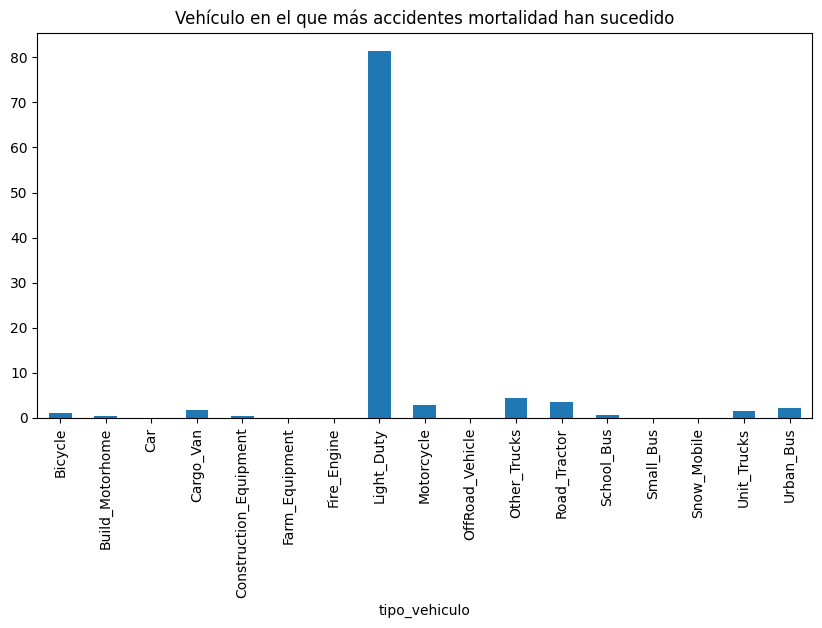

In [ ]:
vehiculomortalidad = df_desc.groupby(df_desc["tipo_vehiculo"])["mortalidad"].sum() / df_desc["mortalidad"].sum() * 100
plt.figure(figsize=(10, 5))
plot = vehiculomortalidad.plot(kind="bar", title="Vehículo en el que más accidentes mortalidad han sucedido")

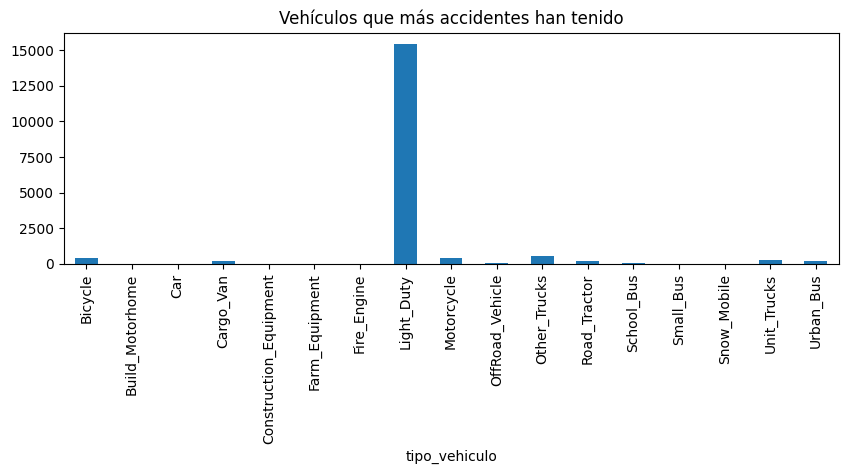

In [ ]:
vehiculoccidentes = df_desc.groupby(df_desc["tipo_vehiculo"])["mortalidad"].count()
plt.figure(figsize=(10, 3))
plot = vehiculoccidentes.plot(kind="bar", title="Vehículos que más accidentes han tenido")

La mayoría de los accidentes se han dado con conductores de coches light-duty (turismos de pasajeros), lo cual era de esperar teniendo en cuenta que la inmensa mayoría de los vehículos que circulan por la carretera.

**Por antiguedad de vehículo**

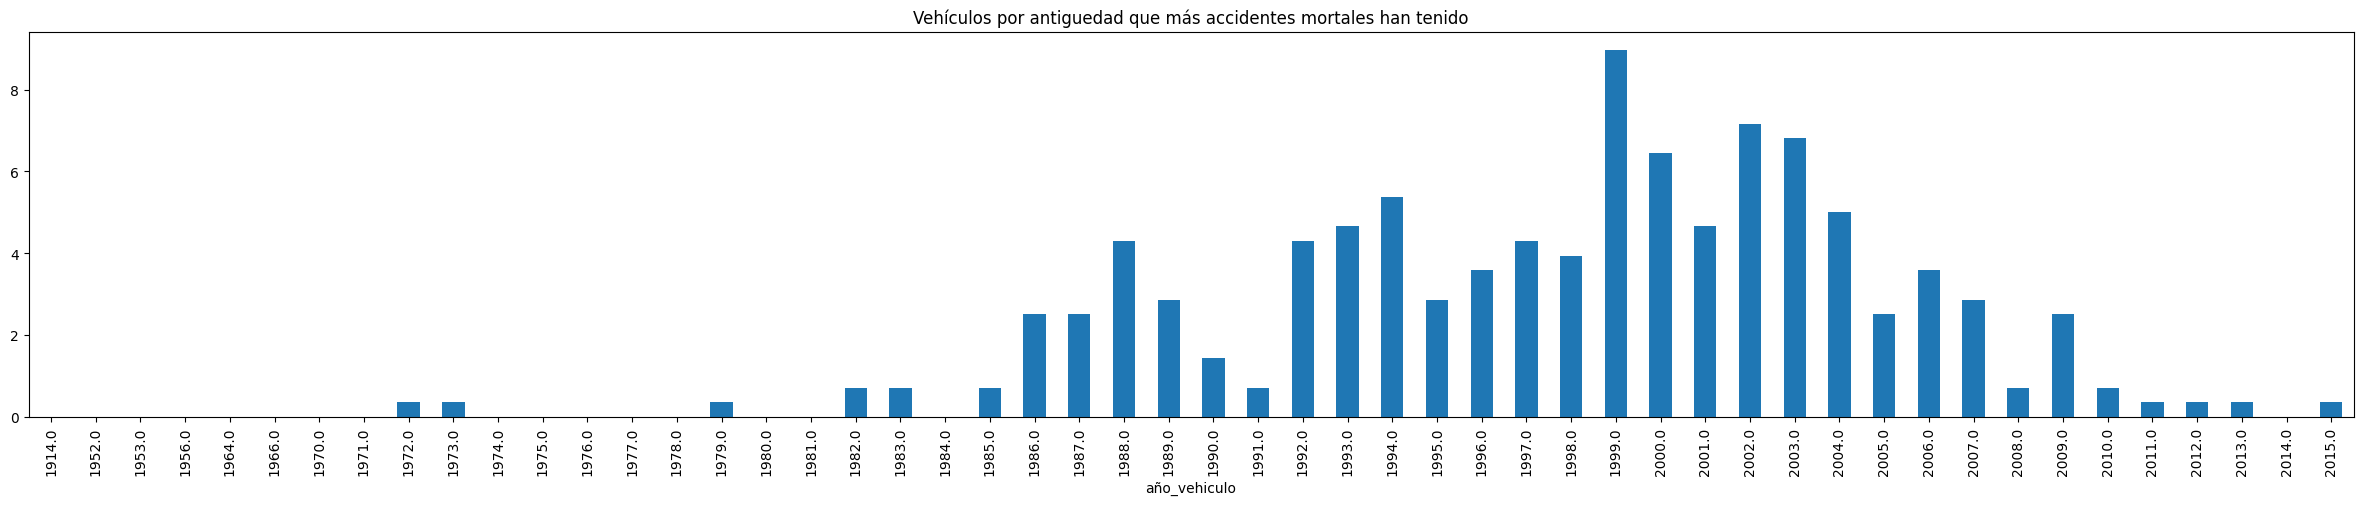

In [ ]:
antiguedadmortalidad = df_desc.groupby(df_desc["año_vehiculo"])["mortalidad"].sum() / df_desc["mortalidad"].sum() * 100
plt.figure(figsize=(30, 5))
plot = antiguedadmortalidad.plot(kind="bar", title="Vehículos por antiguedad que más accidentes mortales han tenido")

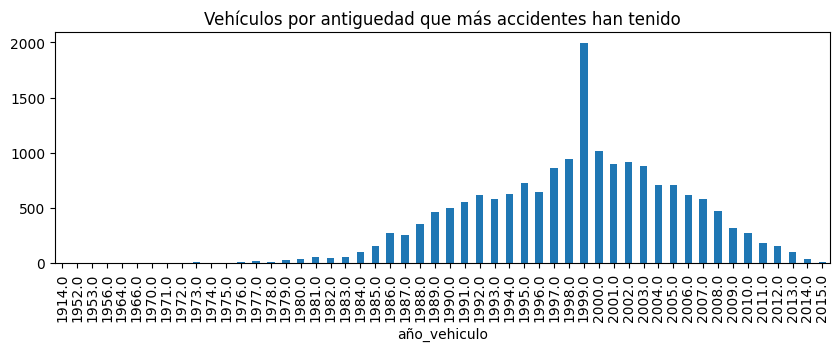

In [ ]:
antiguedadaccidentes = df_desc.groupby(df_desc["año_vehiculo"])["mortalidad"].count()
plt.figure(figsize=(10, 3))
plot = antiguedadaccidentes.plot(kind="bar", title="Vehículos por antiguedad que más accidentes han tenido")

En el primer gráfico observamos como los vehículos mas nuevos apenas tienen accidentes mortales, como es de esperar ya que las tencologías en materia de seguridad vial han evolucionado de gran manera.

Los vehículos que más accidentes tienen, y lo hacen de forma mucho mayor que el resto, son los vehículos de 1999, Esto puede ser debido a edad promedio del parque de vehículos canadiense que se enceuntre cerca de esa fecha, ya que nos resulta extraño la gran diferencia que hay con el resto de años. Al realizar este gráfico nos esperamos que fuera ascendiento los accidentes en los vehículos mas antiguos, pero esto no ha resultado ser tanto así.

**Por hora del día**

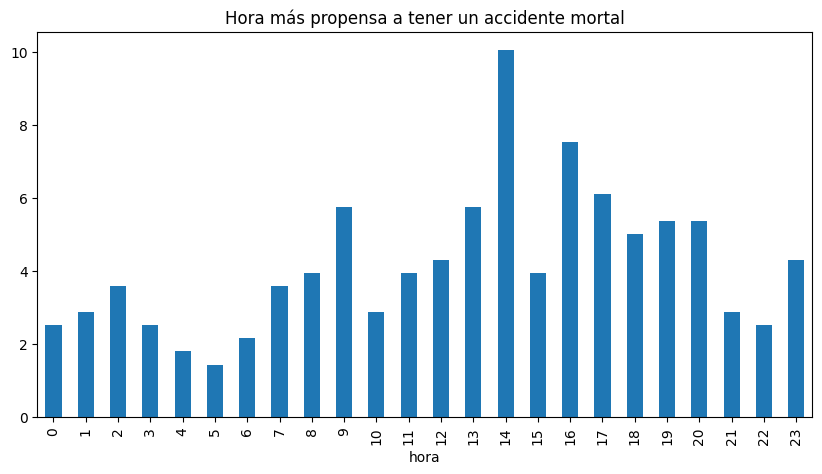

In [ ]:
horamortalidad = df_desc.groupby(df_desc["hora"])["mortalidad"].sum() / df_desc["mortalidad"].sum() * 100
plt.figure(figsize=(10, 5))
plot = horamortalidad.plot(kind="bar", title="Hora más propensa a tener un accidente mortal")

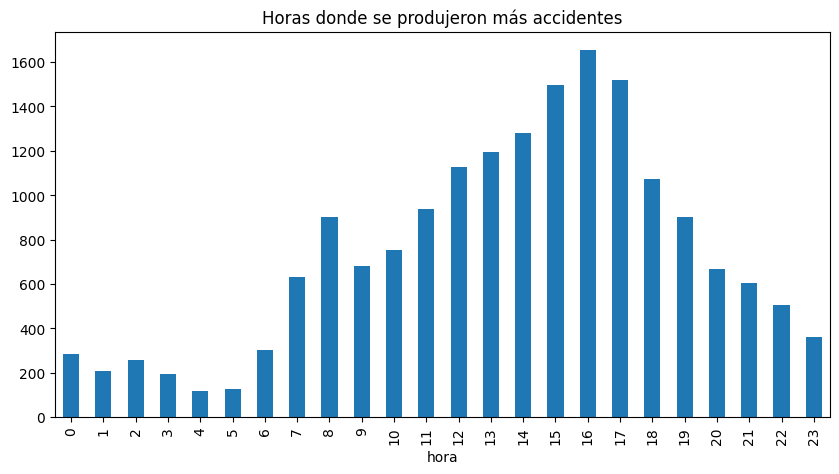

In [ ]:
horaccidentes = df_desc.groupby(df_desc["hora"])["mortalidad"].count()
plt.figure(figsize=(10, 5))
plot = horaccidentes.plot(kind="bar", title="Horas donde se produjeron más accidentes")

En el primer gráfico observamos como La mayor mortalidad se encuentra condensada en la madrugada, ya que tenemos un alto número de accidentes mortales y el nivel de vehículos en movimiento en esas horas es muy bajo.

Por otro lado, observamos como la mayoría de accidentes se agrupan en el intervalo horario comprendido entre las 13 y las 19h. Podemos asumir, a grandes rasgos, que se debe a los horarios de salida del trabajo.



**Por edad**

Se filtra el data por la columna Rol_Pasajero y las filas que contengan el número 11, ya que este hace referencia a que la persona involucrada en el accidente iba conduciendo

In [ ]:
df_desc_conductor = df.loc[df_desc["rol_pasajero"] == 11]
df_desc_conductor

,año,mes,dia_mes,hora,mortalidad,numero_vehiculo,tipo_accidente,lugar_accidente,clima_accidente,estado_superficie,control_trafico,id_vehiculo,tipo_vehiculo,año_vehiculo,id_pasajero,edad_pasajero,rol_pasajero,severidad_pasajero,seguridad_pasajero,tipo_pasajero
4,2014,9,1,7,2,3.0,21,1.0,1.0,1.0,1.0,2,1,2001.0,1,36.0,11,2.0,2,1.0
5,2014,12,1,7,2,1.0,4,1.0,2.0,5.0,18.0,1,6,1998.0,1,67.0,11,2.0,2,1.0
7,1999,4,6,23,2,1.0,3,1.0,1.0,1.0,18.0,1,1,1990.0,1,20.0,11,2.0,1,1.0
8,2002,6,7,9,2,1.0,4,1.0,3.0,2.0,18.0,1,14,2000.0,1,57.0,11,2.0,0,5.0
9,2013,12,4,10,2,2.0,21,2.0,1.0,1.0,1.0,1,1,2007.0,1,82.0,11,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2001,2,2,11,2,2.0,33,2.0,1.0,3.0,18.0,2,1,1990.0,1,18.0,11,2.0,0,1.0
19995,2014,7,1,11,2,2.0,21,2.0,1.0,1.0,18.0,2,1,2007.0,1,35.0,11,2.0,2,1.0
19996,1999,5,6,13,2,2.0,35,2.0,3.0,2.0,4.0,2,1,1995.0,1,35.0,11,2.0,2,1.0
19997,2001,7,5,15,2,2.0,21,2.0,1.0,1.0,1.0,2,1,1987.0,1,62.0,11,2.0,2,1.0


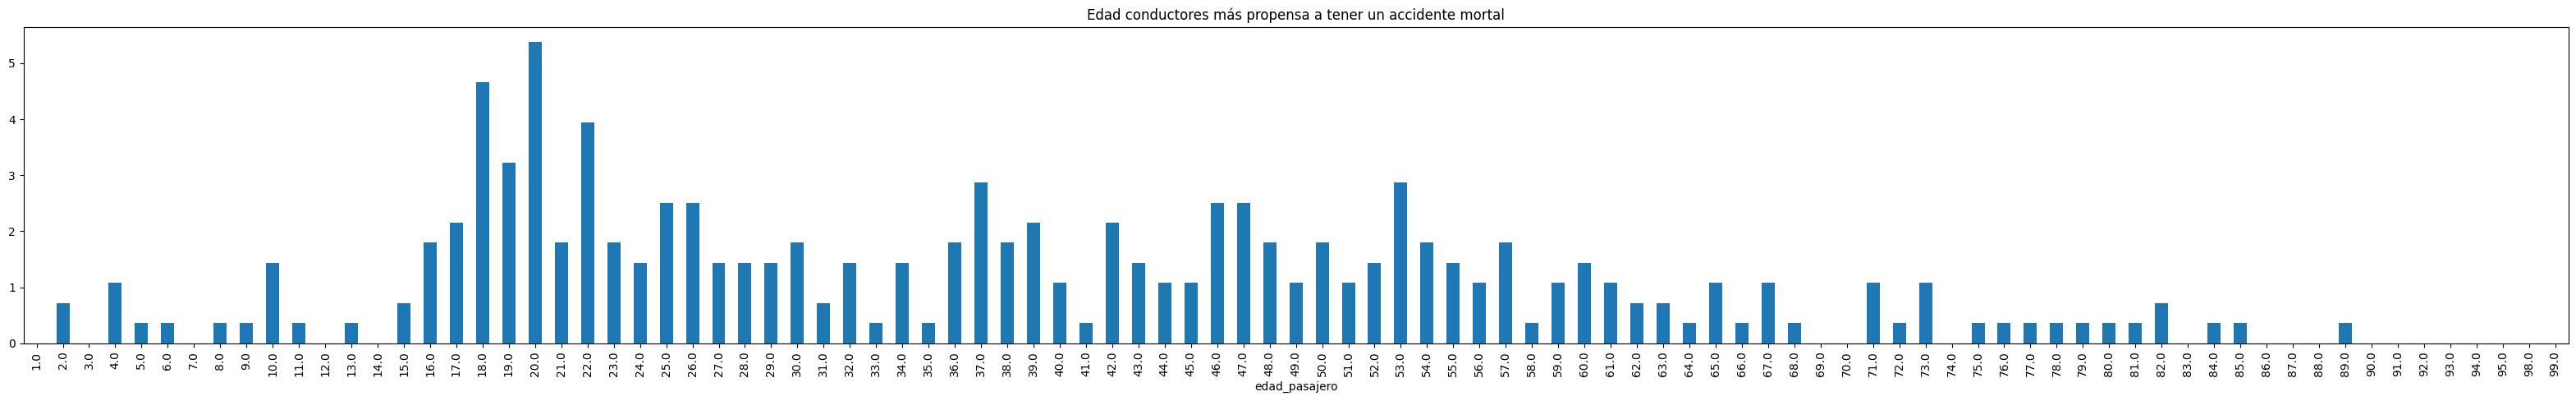

In [ ]:
edadmortalidad = df_desc.groupby(df_desc["edad_pasajero"])["mortalidad"].sum() / df_desc["mortalidad"].sum() * 100
plt.figure(figsize=(40, 5))
plot = edadmortalidad.plot(kind="bar", title="Edad conductores más propensa a tener un accidente mortal")

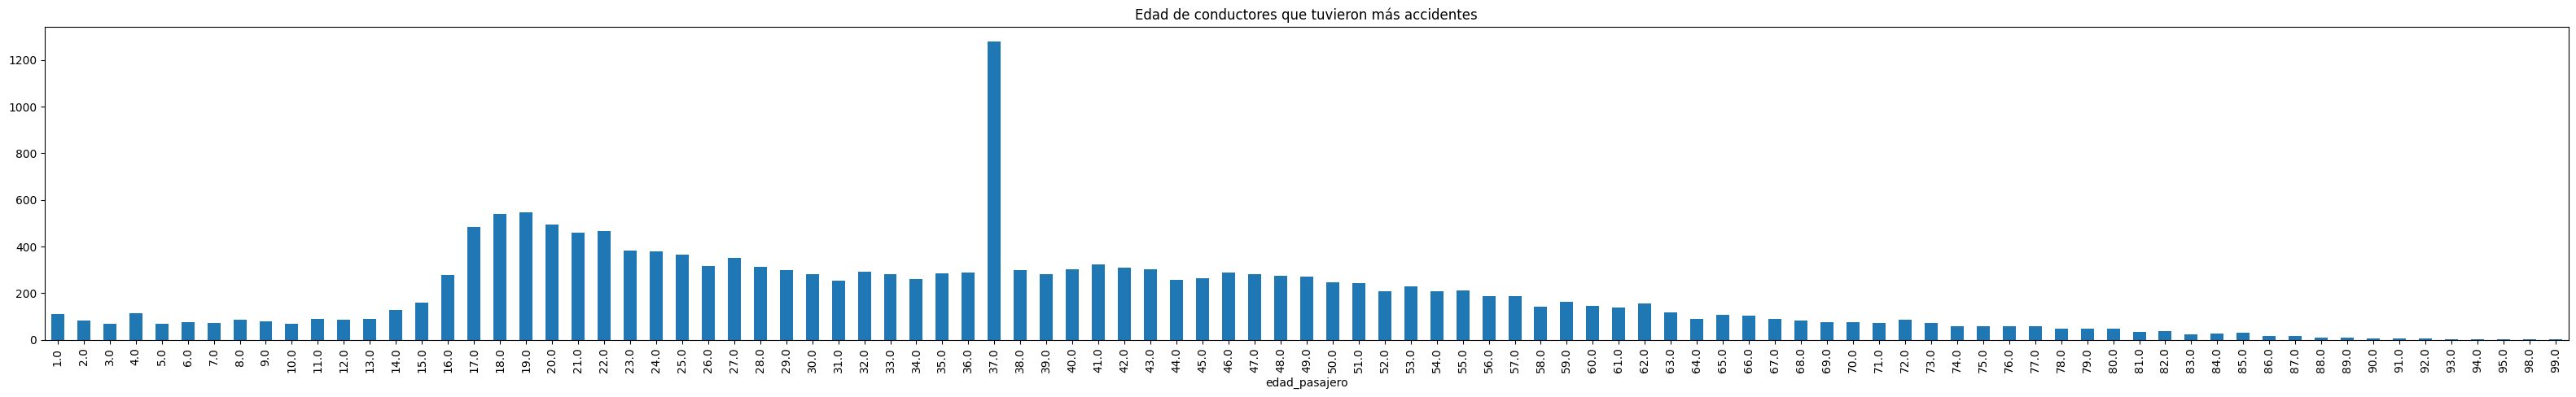

In [ ]:
edadaccidentes = df_desc.groupby(df_desc["edad_pasajero"])["mortalidad"].count()
plt.figure(figsize=(40, 5))
plot = edadaccidentes.plot(kind="bar", title="Edad de conductores que tuvieron más accidentes")

Los conductores más propensos a tener un accidente mortal son los que tienen entre 18 y 22 años, esto se debe claramente a la inexperiencia de estos conductores noveles en las carreteras y por comportamientos de conducción arriesgados

Los conductores que más accidente tiene son los que tienen 37 años, esto puede ser debido a las posibles distracciones y resposabilidades que las personas de esta edad suelen tener y por unn exceso de confianza ea la hora de la conduccion, al haber acumulado ya cierta experiencia

**Relación dispositivo de seguridad con accidentes y fallecimiento**

Descodificamos los datos de la columna seguridad_pasajero, para que más adelante, al realizar los gráficos aparezca directamente el nombre del tipo de dispositivo de seguridad y no su código.

In [ ]:
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({1.0:"No_safety_Device_Used"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({2.0:"Safety_Device_Used"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({9.0:"Helmet"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({10.0:"Reflecting_Clothing"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({11.0:"Helmet_Reflecting"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({12.0:"Other"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({13.0:"No_Safety_Deviced_Equipped"})
df_desc["seguridad_pasajero"] = df_desc["seguridad_pasajero"].replace({0.0:"No_Info"})

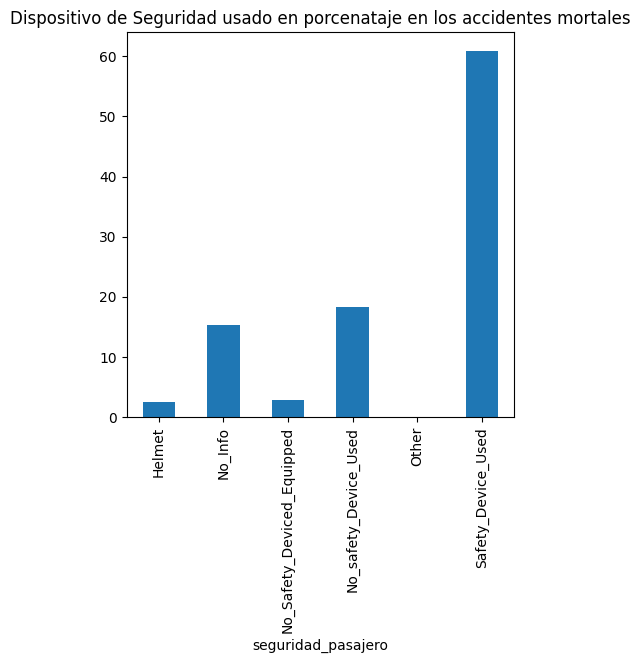

In [ ]:
seguridadmortalidad = df_desc.groupby(df_desc["seguridad_pasajero"])["mortalidad"].sum() / df_desc["mortalidad"].sum() * 100
plt.figure(figsize=(5, 5))
plot = seguridadmortalidad.plot(kind="bar", title="Dispositivo de Seguridad usado en porcenataje en los accidentes mortales")

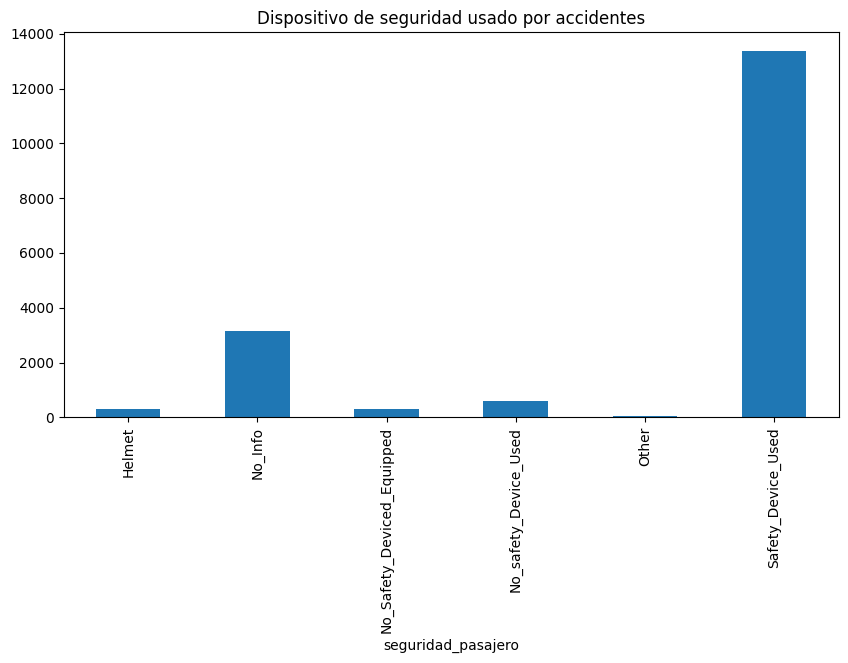

In [ ]:
seguridadaccidentes = df_desc.groupby(df_desc["seguridad_pasajero"])["mortalidad"].count()
plt.figure(figsize=(10, 5))
plot = seguridadaccidentes.plot(kind="bar", title="Dispositivo de seguridad usado por accidentes")

Es interesante observar como en los casos en los que no se utilizan dispositivo de seguridad, es mucho mayor para los casos mortales que para los accidentes en general, esto nos indica que exista una relación directa y entre los accidentes en los que finalmente acaba falleciendo alguie, y el no llevar ningun dispositivo de seguridad

**Estudio del impacto del clima y festividades en los accidentes**





In [ ]:
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({1.0:"Clear and sunny"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({2.0:"Overcast, cloudy but no precipitation"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({3.0:"Rainning"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({4.0:"Snowing"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({5.0:"Freezing rain / hail"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({6.0:"Visibility limitation"})
df_desc["clima_accidente"] = df_desc["clima_accidente"].replace({7.0:"Strong wind"})

In [ ]:
clima_mortalidad  = df_desc.groupby('clima_accidente')['mortalidad'].value_counts(normalize=True).unstack()

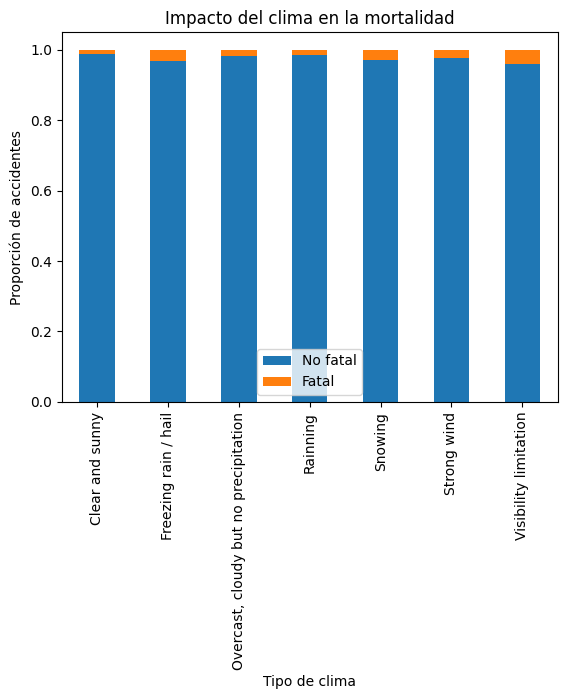

In [ ]:
clima_mortalidad.plot(kind='bar', stacked=True)

plt.xlabel('Tipo de clima')
plt.ylabel('Proporción de accidentes')
plt.title('Impacto del clima en la mortalidad')
plt.legend(['No fatal', 'Fatal'])

plt.show()

En este gráfico podemos observar como el clima tiene un gran impacto en la severidad de los accidentes. Por un lado, el clima que menos proporción de accidentes severos tiene es el clima despejado. Por otro lado, la situación metereológica que más accidentes severos acumula es la visibilidad limitada y el granizo.

A continuación estudiaremos el impacto de las festividades en el número de accidentes. Nuestra hipotesis inicial es que esperamos que en las épocas del año donde haya vacaciones, es decir verano (de mayo a agosto) y navidades (diciembre y enero) sean los meses donde más accidentes haya.

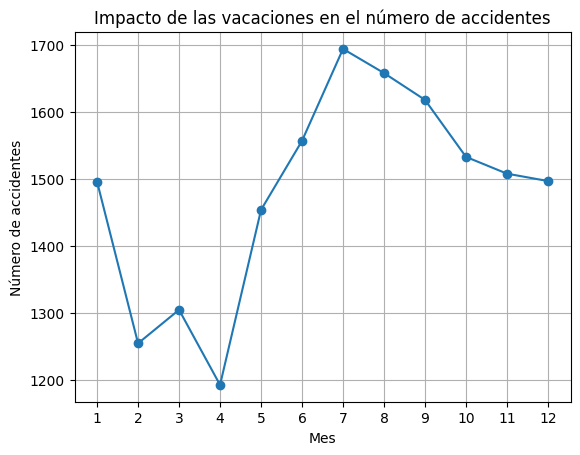

In [ ]:
accidentes_por_mes = df_desc['mes'].value_counts().sort_index()

plt.plot(accidentes_por_mes.index, accidentes_por_mes.values, marker='o')

#  el gráfico
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.title('Impacto de las vacaciones en el número de accidentes')
plt.xticks(range(1, 13))
plt.grid(True)

plt.show()

Con este gráfico podemos confirmar nuestra hipóteses ya que, como podemos apreciar, desde el mes de junio hasta septiembre es la época donde más accidentes ocurren. Desde septiembre hasta enero van disminuyendo y es a partir de enero donde se produce un descenso muy significativo. 

## ELECCIÓN DE MODELOS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=['mortalidad']), df['mortalidad'], test_size=0.20, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

Separación comun para todos los modelos del dataset en train y test, y escalado de los datos



In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=['mortalidad']), df['mortalidad'], test_size=0.20, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
ypred_rf = rf.predict(x_test_scaled)

In [ ]:
y_pred_proba_rf = rf.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_rf[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_rf)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_rf)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_rf)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_rf))/np.sum(confusion_matrix(ytest, ypred_rf),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.8340005453373655
Accuracy of the model: 0.9915588069780529

Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.35      0.52        46
           2       0.99      1.00      1.00      3508

    accuracy                           0.99      3554
   macro avg       1.00      0.67      0.76      3554
weighted avg       0.99      0.99      0.99      3554


Confusion matrix: 
[[  16   30]
 [   0 3508]]

Confusion matrix normalizada: 
[[0.34782609 0.65217391]
 [0.         1.        ]]



**AJUSTE UMBRAL**

In [ ]:
#DE ESTA FORMA SE AJUSTA EL UMBRAL DE PREDICCIÓN DE FORMA MANUAL, DE LA OTRA FORMA DE MAS ABAJO ESTAMOS BUSCANDO EL PUTNO MAS OPTIMO

# Definir el umbral personalizado
#threshold = 0.6

# Aplicar el umbral a las probabilidades de predicción
#y_pred_threshold = (y_pred_proba_rf[:, 1] >= threshold).astype(int)

# Imprimir métricas con el umbral ajustado
#print('Accuracy with threshold {}: {}'.format(threshold, accuracy_score(ytest, y_pred_threshold)))
#print('Classification report with threshold {}: \n{}'.format(threshold, classification_report(ytest, y_pred_threshold)))
#print('Confusion matrix with threshold {}: \n{}'.format(threshold, confusion_matrix(ytest, y_pred_threshold)))


In [ ]:
#AJUSTAMOS EL UMBRAL DE PREDICCIÓN

from sklearn.preprocessing import LabelEncoder
# Convertir las etiquetas de clase a {0, 1}
le = LabelEncoder()
ytest_encoded = le.fit_transform(ytest)

In [ ]:
yhat = y_pred_proba_rf[:, 1]
fpr, tpr, thresholds = roc_curve(ytest_encoded, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

ypred_new_threshold = (y_pred_proba_rf[:,1]>thresholds[ix]).astype(int)

Best Threshold=0.970000, G-Mean=0.788


In [ ]:
# Imprimir métricas con el umbral ajustado
print('Accuracy with threshold {}: {}'.format(thresholds[ix], accuracy_score(ytest, ypred_new_threshold)))
print('Classification report with threshold {}: \n{}'.format(thresholds[ix], classification_report(ytest, ypred_new_threshold)))
print('Confusion matrix with threshold {}: \n{}'.format(thresholds[ix], confusion_matrix(ytest, ypred_new_threshold)))


Accuracy with threshold 0.97: 0.0033764772087788407
Classification report with threshold 0.97: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.26      0.01        46
           2       0.00      0.00      0.00      3508

    accuracy                           0.00      3554
   macro avg       0.00      0.09      0.00      3554
weighted avg       0.00      0.00      0.00      3554

Confusion matrix with threshold 0.97: 
[[   0    0    0]
 [  34   12    0]
 [ 581 2927    0]]


**OVERFITTING**

In [ ]:
ytrain_encoded = le.fit_transform(ytrain)

In [ ]:
ypred = rf.predict(xtrain)
ypred_proba = rf.predict_proba(xtrain)


yhat = ypred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(ytrain_encoded, yhat)

gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

ypred_new_threshold = (ypred_proba[:,1]>thresholds[ix]).astype(int)
#evaluate_model(ytrain,ypred_new_threshold,ypred_proba)

Best Threshold=0.610000, G-Mean=0.583


Tras intentarlo de manera exhaustiva, no conseguimos que nos funcione el ajuste del umbral ni la comprobación del overfitting. Si no se puede ajustar el umbral de clasificación o estudiar el overfitting, puede haber algunas consecuencias importantes. Podría ser difícil equilibrar la precisión y la exhaustividad del modelo, lo que afectaría la capacidad de hacer predicciones precisas. Además, si hay clases desbalanceadas en los datos, el modelo podría favorecer la clase mayoritaria y no capturar bien la clase minoritaria. Interpretar las predicciones también sería más complicado, ya que el umbral no se puede ajustar para equilibrar los errores. Por último, el modelo podría tener dificultades para generalizar correctamente a nuevos datos, lo que afectaría su rendimiento en situaciones del mundo real.

 **REGRESIÓN LOGISTICA** 



In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_scaled, ytrain)

LogisticRegression(random_state=42)

In [ ]:
ypred_lr = lr.predict(x_test_scaled)

In [ ]:
y_pred_proba_lr = lr.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_lr[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_lr)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_lr)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_lr)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_lr))/np.sum(confusion_matrix(ytest, ypred_lr),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.7870457587625799
Accuracy of the model: 0.9884637028700056

Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.11      0.20        46
           2       0.99      1.00      0.99      3508

    accuracy                           0.99      3554
   macro avg       0.99      0.55      0.60      3554
weighted avg       0.99      0.99      0.98      3554


Confusion matrix: 
[[   5   41]
 [   0 3508]]

Confusion matrix normalizada: 
[[0.10869565 0.89130435]
 [0.         1.        ]]



**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, ytrain)

KNeighborsClassifier()

In [ ]:
ypred_knn= knn.predict(x_test_scaled)

In [ ]:
y_pred_proba_knn = knn.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_knn[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_knn)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_knn)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_knn)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_knn))/np.sum(confusion_matrix(ytest, ypred_knn),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.6207922264637351
Accuracy of the model: 0.9873382104670794

Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.02      0.04        46
           2       0.99      1.00      0.99      3508

    accuracy                           0.99      3554
   macro avg       0.99      0.51      0.52      3554
weighted avg       0.99      0.99      0.98      3554


Confusion matrix: 
[[   1   45]
 [   0 3508]]

Confusion matrix normalizada: 
[[0.02173913 0.97826087]
 [0.         1.        ]]



**BAGGING CLASSIFIER**

In [ ]:
bc = BaggingClassifier(random_state=42)
bc.fit(x_train_scaled, ytrain)


BaggingClassifier(random_state=42)

In [ ]:
ypred_bc = bc.predict(x_test_scaled)

In [ ]:
y_pred_proba_bc = bc.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_bc[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_bc)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_bc)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_bc)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_bc))/np.sum(confusion_matrix(ytest, ypred_bc),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.757963164939765
Accuracy of the model: 0.9904333145751266

Classification report: 
              precision    recall  f1-score   support

           1       0.83      0.33      0.47        46
           2       0.99      1.00      1.00      3508

    accuracy                           0.99      3554
   macro avg       0.91      0.66      0.73      3554
weighted avg       0.99      0.99      0.99      3554


Confusion matrix: 
[[  15   31]
 [   3 3505]]

Confusion matrix normalizada: 
[[3.26086957e-01 6.73913043e-01]
 [8.55188141e-04 9.99144812e-01]]



**Gradient Boost**

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_scaled, ytrain)

GradientBoostingClassifier(random_state=42)

In [ ]:
ypred_gb = gb.predict(x_test_scaled)

In [ ]:
y_pred_proba_gb = gb.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_gb[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_gb)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_gb)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_gb)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_gb))/np.sum(confusion_matrix(ytest, ypred_gb),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.8602944821773835
Accuracy of the model: 0.9898705683736635

Classification report: 
              precision    recall  f1-score   support

           1       0.73      0.35      0.47        46
           2       0.99      1.00      0.99      3508

    accuracy                           0.99      3554
   macro avg       0.86      0.67      0.73      3554
weighted avg       0.99      0.99      0.99      3554


Confusion matrix: 
[[  16   30]
 [   6 3502]]

Confusion matrix normalizada: 
[[0.34782609 0.65217391]
 [0.00171038 0.99828962]]



**LIGHTGBM**

In [ ]:
import lightgbm as lgbm
lgbm = lgbm.LGBMClassifier()
lgbm.fit(x_train_scaled, ytrain)

LGBMClassifier()

In [ ]:
ypred_lgbm = lgbm.predict(x_test_scaled)

In [ ]:
y_pred_proba_lgbm = lgbm.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_lgbm[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_lgbm)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_lgbm)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_lgbm)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_lgbm))/np.sum(confusion_matrix(ytest, ypred_lgbm),axis = 1).reshape(-1,1)))

ROC-AUC score of the model: 0.848513955678945
Accuracy of the model: 0.9912774338773214

Classification report: 
              precision    recall  f1-score   support

           1       0.94      0.35      0.51        46
           2       0.99      1.00      1.00      3508

    accuracy                           0.99      3554
   macro avg       0.97      0.67      0.75      3554
weighted avg       0.99      0.99      0.99      3554


Confusion matrix: 
[[  16   30]
 [   1 3507]]

Confusion matrix normalizada: 
[[3.47826087e-01 6.52173913e-01]
 [2.85062714e-04 9.99714937e-01]]



**ARBOLES DE DECISION**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_scaled, ytrain)

DecisionTreeClassifier()

In [ ]:
ypred_dtree = dtree.predict(x_test_scaled)

In [ ]:
y_pred_proba_dtree = dtree.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_dtree[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_dtree)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_dtree)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_dtree)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_dtree))/np.sum(confusion_matrix(ytest, ypred_dtree),axis = 1).reshape(-1,1)))

ROC-AUC score of the model: 0.6878129492836249
Accuracy of the model: 0.9766460326392797

Classification report: 
              precision    recall  f1-score   support

           1       0.25      0.39      0.30        46
           2       0.99      0.98      0.99      3508

    accuracy                           0.98      3554
   macro avg       0.62      0.69      0.65      3554
weighted avg       0.98      0.98      0.98      3554


Confusion matrix: 
[[  18   28]
 [  55 3453]]

Confusion matrix normalizada: 
[[0.39130435 0.60869565]
 [0.01567845 0.98432155]]



**CONCLUSIONES**

In [ ]:
datos_modelos = {'Modelo': ['Random Forest', 'Regresión logística', 'KNN', 'Bagging Classifier', 'Gradient Boost','LightGBM','Árboles de decisión'],

                'Accuracy': ['1', '1', '1', '0.83', '0.73', '0.94', '0.24'],

                'ROC-AUC': ['0.83', '0.78', '0.62', '0.86', '0.81', '0.85', '0.68'],

                'False positives': ['0', '0', '0', '0.', '0', '0', '0.01'],

                'True positives': ['0.34', '0.10', '0', '0.001', '0.34', '0', '0.39' ],

                }

tabla_modelos = pd.DataFrame(datos_modelos, columns=['Modelo', 'Accuracy', 'ROC-AUC', 'False positives',
                                                    'True positives'])
tabla_modelos

,Modelo,Accuracy,ROC-AUC,False positives,True positives
0,Random Forest,1,0.83,0,0.34
1,Regresión logística,1,0.78,0,0.10
2,KNN,1,0.62,0,0
3,Bagging Classifier,0.83,0.86,0.,0.001
4,Gradient Boost,0.73,0.81,0,0.34
5,LightGBM,0.94,0.85,0,0
6,Árboles de decisión,0.24,0.68,0.01,0.39


**Precisión (Accuracy):** El modelo Random Forest tiene una precisión de 1, lo que nos indica que clasifica prácticamente todas las muestras de forma correcta del conjunto de datos utilizado.

**ROC-AUC:** El área bajo la curva ROC del modelo Gradient es de 0.83, es de los valores más cercanos a 1 y representa un mejor buen rendimiento de clasificación.

**Falsos positivos y verdaderos positivos**: el modelo Random Forest tiene un bajo número de falsos positivos (0) y un alto número de verdaderos positivos (0.34). Esto significa que el modelo tiene capacidad para identificar correctamente las muestras positivas y minimiza los errores de clasificación. Aún asi, la cifra de verdaderos positivos no es suficiente como para considerarlo un buen modelo.

En resumen, el modelo  **Random Forest muestra el mejor rendimiento frente a los otros modelos en términos de precisión, ROC-AUC y capacidad para clasificar correctamente las muestras positivas, por lo que estas características hacen que sea una opción sólida como modelo final.



**OPTIMIZACIÓN**

GRADIENT BOOST

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}


CV2 = GridSearchCV(rf, param_grid, cv=3, n_jobs=8, scoring='roc_auc', verbose=1)

In [ ]:
CV2.fit(xtrain, ytrain)
print(CV2.best_params_)
print(CV2.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


ValueError: ignored

(De repente ha dejado de computar, pero dejamos el resultado que daba antes de que empezase a fallar)

In [ ]:
ypred_gb2 = CV2.predict(x_test_scaled)
y_pred_proba_gb2 = CV2.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_gb2[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_gb2)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_gb2)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_gb2)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_gb2))/np.sum(confusion_matrix(ytest, ypred_gb2),axis = 1).reshape(-1,1),2))

ROC-AUC score of the model: 0.7182960686133558
Accuracy of the model: 0.012943162633652222

Classification report: 
              precision    recall  f1-score   support

           1       0.01      1.00      0.03        46
           2       0.00      0.00      0.00      3508

    accuracy                           0.01      3554
   macro avg       0.01      0.50      0.01      3554
weighted avg       0.00      0.01      0.00      3554


Confusion matrix: 
[[  46    0]
 [3508    0]]

Confusion matrix normalizada: 
[[1. 0.]
 [1. 0.]]



Podemos comprobar como la optimización del modelo no ha sido del todo efectiva, con el modelo incial conseguíamos unos resultados mejores, por lo que ese será nuestro modelo final.

En conclusión, el proyecto de generar un modelo para predecir accidentes ha enfrentado desafíos en términos de eficacia. A pesar de los esfuerzos realizados, el modelo no ha logrado proporcionar resultados satisfactorios en la tarea de predicción de accidentes. Estas dificultades pueden deberse a la falta de ajuste del umbral de clasificación, lo que afecta el equilibrio entre precisión y exhaustividad. Además, la incapacidad para estudiar el overfitting limita la capacidad del modelo para generalizar correctamente a nuevos datos. Estos resultados resaltan la necesidad de seguir explorando y mejorando el enfoque utilizado, considerando técnicas adicionales y recopilando datos más relevantes para fortalecer el rendimiento del modelo en futuras iteraciones del proyecto.